In [48]:
import sys
import cv2
import numpy as np
from skimage.exposure import rescale_intensity
# https://docs.opencv.org/3.4/dc/da3/tutorial_copyMakeBorder.html

def gaussian_matrix():
	A = np.zeros([5,5])
	W = np.array([0.05, 0.25, 0.4, 0.25, 0.05])
	A[2] = W
	A[0][2]=A[4][2] = 0.05
	A[1][2]=A[3][2] = 0.25
	print( A )
	return A

def padded_image(image):
	borderType = cv2.BORDER_CONSTANT
	top = bottom = left = right = 2
	padded_image = cv2.copyMakeBorder(image, top, bottom, left, right, borderType)

	return padded_image

def gaussian_blur(img):
	image = img.copy()
	height, width, ch = image.shape
	print(image.shape)
	image = padded_image(image)
	output = np.zeros((height, width, ch), dtype="float32")
	kernel = gaussian_matrix()
	for i in range(ch):
		for y in range(2, height+2):
			for x in range(2, width+2):
				roi = image[y-2:y+3, x-2:x+3, i]
				k = (roi*kernel).sum()
				output[y-2,x-2,i] = k/(kernel.sum())
	output = rescale_intensity(output, in_range=(0, 255))
	blurred = (output*255).astype("uint8")
	return blurred

def pyrDown(img):
	image = img.copy()
	scale = 0.5
	width = int(image.shape[1]*scale)
	height = int(image.shape[0]*scale)
	dim = (width, height)
	resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
	return resized

def pyrUp(img):
	image = img.copy()
	scale = 2
	width = int(image.shape[1]*scale)
	height = int(image.shape[0]*scale)
	dim = (width, height)
	resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
	return resized

def gaussian_pyramid(image,levels):
	assert np.power(2,levels)<=image.shape[0] and np.power(2,levels)<=image.shape[1]
	layer = image.copy()
	arr = [layer]
	for i in range(levels):
		blurred = gaussian_blur(layer)
		layer = pyrDown(blurred)
		arr.append(layer)
	return arr
	
def print_gaussian(gaussian_pyramid):
	for i in range(len(gaussian_pyramid)):
		cv2.imshow(str(i), gaussian_pyramid[i])
		cv2.waitKey(0)

def laplacian_pyramid(image,levels):
	assert np.power(2,levels)<=image.shape[0] and np.power(2,levels)<=image.shape[1]
	layer = image.copy()
	gp = gaussian_pyramid(layer,levels)

	lp = []
	for i in range(1, levels):
		expanded_image = pyrUp(gp[i])
		j = i-1
		laplacian = cv2.subtract(gp[j], expanded_image)
		lp.append(laplacian)
	lp.append(gp[levels-1])
	return lp

def reconstructed(lp):
	levels = len(lp)
	print(levels)
	i = levels-1
	expanded_image = pyrUp(lp[i])
	i = i-1
	for j in range(i, -1, -1):
		corrected_image = cv2.add(expanded_image, lp[j])
		expanded_image = pyrUp(corrected_image)
	return corrected_image



In [49]:
image = cv2.imread('test_images/test.png')
a = gaussian_pyramid(image,5)

(512, 512, 3)
[[0.   0.   0.05 0.   0.  ]
 [0.   0.   0.25 0.   0.  ]
 [0.05 0.25 0.4  0.25 0.05]
 [0.   0.   0.25 0.   0.  ]
 [0.   0.   0.05 0.   0.  ]]
(256, 256, 3)
[[0.   0.   0.05 0.   0.  ]
 [0.   0.   0.25 0.   0.  ]
 [0.05 0.25 0.4  0.25 0.05]
 [0.   0.   0.25 0.   0.  ]
 [0.   0.   0.05 0.   0.  ]]
(128, 128, 3)
[[0.   0.   0.05 0.   0.  ]
 [0.   0.   0.25 0.   0.  ]
 [0.05 0.25 0.4  0.25 0.05]
 [0.   0.   0.25 0.   0.  ]
 [0.   0.   0.05 0.   0.  ]]
(64, 64, 3)
[[0.   0.   0.05 0.   0.  ]
 [0.   0.   0.25 0.   0.  ]
 [0.05 0.25 0.4  0.25 0.05]
 [0.   0.   0.25 0.   0.  ]
 [0.   0.   0.05 0.   0.  ]]
(32, 32, 3)
[[0.   0.   0.05 0.   0.  ]
 [0.   0.   0.25 0.   0.  ]
 [0.05 0.25 0.4  0.25 0.05]
 [0.   0.   0.25 0.   0.  ]
 [0.   0.   0.05 0.   0.  ]]


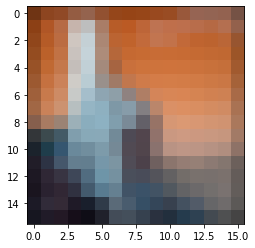

In [59]:
plt.imshow(a[5])

In [40]:
b

array([[[0.00450564, 0.00224911, 0.00114529],
        [0.00536687, 0.00276382, 0.00147606],
        [0.00539529, 0.00287982, 0.0016166 ],
        ...,
        [0.00548241, 0.00436571, 0.0038779 ],
        [0.00547355, 0.00442835, 0.00395377],
        [0.00464832, 0.00368871, 0.00326741]],

       [[0.00534314, 0.00252959, 0.00099305],
        [0.00625647, 0.002979  , 0.00118972],
        [0.00626671, 0.00308994, 0.00135064],
        ...,
        [0.00627031, 0.00516599, 0.00455147],
        [0.00626507, 0.00515342, 0.00458727],
        [0.00545137, 0.00435322, 0.00386798]],

       [[0.00534944, 0.00239736, 0.00069605],
        [0.00626515, 0.00280219, 0.00079798],
        [0.00627451, 0.0029528 , 0.00106229],
        ...,
        [0.00627451, 0.00514456, 0.00456594],
        [0.00626889, 0.00499256, 0.00443667],
        [0.0054466 , 0.00419132, 0.00371884]],

       ...,

       [[0.00220647, 0.00253346, 0.00304584],
        [0.00154244, 0.00168265, 0.00230003],
        [0.00182002, 0

In [62]:
import sys
import cv2
import numpy as np
from skimage.exposure import rescale_intensity
# https://docs.opencv.org/3.4/dc/da3/tutorial_copyMakeBorder.html

def gaussian_matrix():
	A = np.zeros([5,5])
	W = np.array([0.05, 0.25, 0.4, 0.25, 0.05])
	A[2] = W
	A[0][2]=A[4][2] = 0.05
	A[1][2]=A[3][2] = 0.25
	print( A )
	return A

def padded_image(image):
	borderType = cv2.BORDER_CONSTANT
	top = bottom = left = right = 2
	padded_image = cv2.copyMakeBorder(image, top, bottom, left, right, borderType)

	return padded_image

def gaussian_blur(image):
	height, width, ch = image.shape
	print(image.shape)
	image = padded_image(image)
	output = np.zeros((height, width, ch), dtype="float32")
	kernel = gaussian_matrix()
	for i in range(ch):
		for y in range(2, height+2):
			for x in range(2, width+2):
				roi = image[y-2:y+3, x-2:x+3, i]
				k = (roi*kernel).sum()
				output[y-2,x-2,i] = k
	output = rescale_intensity(output, in_range=(0, 255))
	blurred = (output*255).astype("uint8")
	return blurred

def pyrDown(image):
	scale = 0.5
	width = int(image.shape[1]*scale)
	height = int(image.shape[0]*scale)
	dim = (width, height)
	resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
	return resized

def pyrUp(image):
	scale = 2
	width = int(image.shape[1]*scale)
	height = int(image.shape[0]*scale)
	dim = (width, height)
	resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
	return resized

def gaussian_pyramid(image):
    layer = image.copy()
    arr = [layer]
    for i in range(5):
        blurred = gaussian_blur(layer)
        layer = pyrDown(blurred)
        arr.append(layer)
    return arr
    
def print_gaussian(gaussian_pyramid):
	for i in range(5):
		cv2.imshow(str(i), gaussian_pyramid[i])
		cv2.waitKey(0)
	return gp

def laplacian_pyramid(image):
	layer = image.copy()
	gp = [layer]
	for i in range(5):
		blurred = gaussian_blur(layer)
		layer = pyrDown(layer)
		gp.append(layer)

	lp = []
	for i in range(1, 5):
		expanded_image = pyrUp(gp[i])
		j = i-1
		laplacian = cv2.subtract(gp[j], expanded_image)
		lp.append(laplacian)
	lp.append(gp[4])
	return lp

def reconstructed(laplacian_pyramid):
	expanded_image = pyrUp(laplacian_pyramid[4])
	for i in range(3, -1, -1):
		corrected_image = cv2.add(expanded_image, laplacian_pyramid[i])
		expanded_image = pyrUp(corrected_image)
	return corrected_image

file = "test_images/test.png"
image = cv2.imread(file)



In [63]:
G = gaussian_pyramid(image)

(512, 512, 3)
[[0.   0.   0.05 0.   0.  ]
 [0.   0.   0.25 0.   0.  ]
 [0.05 0.25 0.4  0.25 0.05]
 [0.   0.   0.25 0.   0.  ]
 [0.   0.   0.05 0.   0.  ]]
(256, 256, 3)
[[0.   0.   0.05 0.   0.  ]
 [0.   0.   0.25 0.   0.  ]
 [0.05 0.25 0.4  0.25 0.05]
 [0.   0.   0.25 0.   0.  ]
 [0.   0.   0.05 0.   0.  ]]
(128, 128, 3)
[[0.   0.   0.05 0.   0.  ]
 [0.   0.   0.25 0.   0.  ]
 [0.05 0.25 0.4  0.25 0.05]
 [0.   0.   0.25 0.   0.  ]
 [0.   0.   0.05 0.   0.  ]]
(64, 64, 3)
[[0.   0.   0.05 0.   0.  ]
 [0.   0.   0.25 0.   0.  ]
 [0.05 0.25 0.4  0.25 0.05]
 [0.   0.   0.25 0.   0.  ]
 [0.   0.   0.05 0.   0.  ]]
(32, 32, 3)
[[0.   0.   0.05 0.   0.  ]
 [0.   0.   0.25 0.   0.  ]
 [0.05 0.25 0.4  0.25 0.05]
 [0.   0.   0.25 0.   0.  ]
 [0.   0.   0.05 0.   0.  ]]


In [86]:
import sys
import cv2
import numpy as np
from skimage.exposure import rescale_intensity
# https://docs.opencv.org/3.4/dc/da3/tutorial_copyMakeBorder.html


yuv_from_rgb = np.array([[ 0.299     ,  0.587     ,  0.114      ],
                         [-0.14714119, -0.28886916,  0.43601035 ],
                         [ 0.61497538, -0.51496512, -0.10001026 ]])

rgb_from_yuv = np.linalg.inv(yuv_from_rgb)

def yuv2rgb(yuv):
    return np.clip(np.dot(yuv,rgb_from_yuv),0,1)

def gaussian_matrix():
	A = np.zeros([5,5])
	W = np.array([0.05, 0.25, 0.4, 0.25, 0.05])
	A[2] = W
	A[0][2]=A[4][2] = 0.05
	A[1][2]=A[3][2] = 0.25
	return A

def padded_image(image):
	borderType = cv2.BORDER_CONSTANT
	top = bottom = left = right = 2
	padded_image = cv2.copyMakeBorder(image, top, bottom, left, right, borderType)

	return padded_image

def gaussian_blur(img):
    image = img.copy()
    height, width, ch = image.shape
    print(image.shape)
    image = padded_image(image)
    output = np.zeros((height, width, ch), dtype="float32")
    kernel = gaussian_matrix()
    for i in range(ch):
        for y in range(2, height+2):
            for x in range(2, width+2):
                roi = image[y-2:y+3, x-2:x+3, i]
                k = (roi*kernel).sum()
                output[y-2,x-2,i] = k/(kernel.sum())
    output = rescale_intensity(output, in_range=(0, 255))
    output=  (output*255).astype('uint8')
    return output

def pyrDown(img):
	image = img.copy()
	scale = 0.5
	width = int(image.shape[1]*scale)
	height = int(image.shape[0]*scale)
	dim = (width, height)
	resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
	return resized

def pyrUp(img):
	image = img.copy()
	scale = 2
	width = int(image.shape[1]*scale)
	height = int(image.shape[0]*scale)
	dim = (width, height)
	resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
	return resized

def gaussian_pyramid(image,levels):
	assert np.power(2,levels)<=image.shape[0] and np.power(2,levels)<=image.shape[1]
	layer = image.copy()
	arr = [layer]
	for i in range(levels):
		blurred = gaussian_blur(layer)
		layer = pyrDown(blurred)
		arr.append(layer)
	return arr
	
def print_gaussian(gaussian_pyramid):
	for i in range(len(gaussian_pyramid)):
		cv2.imshow(str(i), gaussian_pyramid[i])
		cv2.waitKey(0)

def laplacian_pyramid(image,levels):
	assert np.power(2,levels)<=image.shape[0] and np.power(2,levels)<=image.shape[1]
	layer = image.copy()
	gp = gaussian_pyramid(layer,levels)

	lp = []
	for i in range(1, levels+1):
		expanded_image = pyrUp(gp[i])
		j = i-1
		laplacian = cv2.subtract(gp[j], expanded_image)
		lp.append(laplacian)
	lp.append(gp[-1])
	return lp,gp

def reconstructed(lp,gp):
	levels = len(lp)
	expanded_image = pyrUp(lp[-1])	
	for i in range(levels-2,-1,-1):
		corrected_image = cv2.add(expanded_image,lp[i])
		expanded_image = pyrUp(corrected_image)
	return corrected_image


In [87]:
file = "test_images/test.png"
image = cv2.imread(file)


In [91]:
a = gaussian_pyramid(image,3)

(512, 512, 3)
(256, 256, 3)
(128, 128, 3)


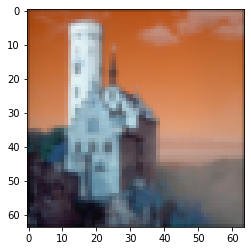

In [96]:
plt.imshow(a[3])